# Material zur Fallstudie

In dieser Fallstudie unterstützen Sie einen Stromversorger bei seiner Investitionsentscheidung für neue Kraftwerke. Ihre Aufgabe ist es, den Kapitalwert verschiedener Stromerzeugungstechnologien zu berechnen und dabei Unsicherheiten in der Entwicklung von Strom- und Brennstoffpreisen zu berücksichtigen. Anschließend sollen die Ergebnisse analysiert und interpretiert werden, um die Entscheidungsfindung des Unternehmens zu unterstützen.

Dieses Notebook gliedert sich wie folgt:

**1. Organisation der Fallstudie** Beschreibung des organisatorischen Ablaufs der Fallstudie  
**2:** Grundlagen und Wiederholung: Erläuterung der Konzepte, die Sie zur Bearbeitung der Fallstudie benötigen  
**3:** Aufgabenstellung und Bereitstellung der Daten für die Fallstudie


## 1. Organisation der Fallstudie

Die Bearbeitung der Fallstudie ist folgendermaßen organisiert:

- Alle notwendigen Materialien zur Bearbeitung der Fallstudie finden Sie in diesem Moodle-Kurs.
- Zur Bearbeitung empfehlen wir Excel, LibreOffice oder OpenOffice. Alternativ können Sie aber auch Python oder eine andere Programmiersprache verwenden.
- Es gibt eine Übung zur Fallstudie am 28.05.2025. Alle weiteren Aufgaben zur Fallstudie müssen asynchron bearbeitet werden.
- Sie können bis zu 5 Bonuspunkte für die Klausur erwerben (Gesamtpunktzahl: 60 Punkte).
- Mit dem Material in diesem Notebook berechnen Sie alle Ergebnisse und erstellen einige Diagramme.
- Im Theorieteil dieses Notebooks finden Sie einige Verständnisfragen. Diese dienen lediglich Ihrer Selbstüberprüfung und haben keinen Einfluss auf die Bonuspunkte.
- Dei Bewertung der Fallstudie erfolgt anhand der von Ihnen abgegebenen Berechnungen (z. B. Ihr LibreOffice Calc Dokument)
  

## 2. Grundlagen und Wiederholung

## 2.1 Energiemärkte

### Strommärkte

Kraftwerksbetreiber können auf verschiedenen Märkten tätig sein, um Gewinne zu erzielen:

- **Terminmärkte (Forward/Future Markets)**: langfristige Lieferverträge, Jahre im Voraus abgeschlossen.
- **Großhandelsmärkte (Spotmärkte)**:
  - **Day-Ahead-Markt**: Strom für den Folgetag.
  - **Intraday-Markt**: Strom für den gleichen Tag, oft bis kurz vor Lieferbeginn.

> **Begriff:** *Merit-Order* – Angebotsreihung nach Grenzkosten. Der Preis richtet sich nach dem teuersten noch benötigten Kraftwerk.

Zusätzlich gibt es den **Regelenergiemarkt**. Dort schreiben Übertragungsnetzbetreiber verschiedene Arten von Reserveleistung aus:

- **Primärreserve**: innerhalb weniger Sekunden verfügbar,
- **Sekundärreserve**: Reaktion nach ca. 5 Minuten,
- **Tertiärreserve**: manuell zuschaltbar, ab 15 Minuten.

> **Hinweis:** In der Fallstudie betrachten wir ausschließlich die Gewinne am Großhandelsmarkt.

### Zahlungsströme von Kraftwerken

Ein Kraftwerk mit installierter elektrischer Leistung $P_{\text{inst}}$ (MW), Wirkungsgrad $\eta$ und Volllaststunden $FL$ produziert eine elektrische Energiemenge $Q$ (MWh) im Jahr.

**Einnahmen durch Stromverkauf**

$$\text{CF}_{\text{Verkauf}} = p \cdot Q$$

$$Q = FL \cdot P_{\text{inst}}$$

> Volllaststunden sind ein theoretisches Maß für die jährliche Auslastung eines Kraftwerks. Sie geben an, wie viele Stunden ein Kraftwerk mit seiner **maximalen Leistung** betrieben werden müsste, um die tatsächliche Jahresproduktion zu erreichen.
> Beispiel: Ein Kraftwerk mit 5 MW Leistung, das 2000 h pro Jahr mit 50 % Auslastung läuft (also 2,5 MW), produziert:
>$$2,5 \text{MW} \cdot 2000 \text{h} = 5.000 \text{MWh}$$
> Um dieselbe Energiemenge mit **Volllast (5 MW)** zu erzeugen, wären nur
>$$5 \text{MW} \cdot 1000 \text{h} = 5.000 \text{MWh}$$
> nötig. Das Kraftwerk lief also 1000 Volllaststunden.

**Fixe Betriebskosten (FOM – Fixed Operation & Maintenance Costs)**

$$\text{CF}_{\text{FOM}} = -\text{FOM} \cdot P_{\text{inst}}$$

**Variable Betriebskosten (VOM – Variable Operation & Maintenance Costs)**

$$\text{CF}_{\text{VOM}} = -\text{VOM} \cdot Q$$

**Brennstoffkosten**

$$Q = Q_{\text{fuel}} \cdot H \cdot \eta$$

$$Q_{\text{fuel}} = \frac{Q}{H \cdot \eta}$$

$$\text{CF}_{\text{fuel}} = -\frac{Q \cdot p_{\text{fuel}}}{H \cdot \eta}$$

**CO₂-Kosten**

$$\text{CF}_{\text{CO}_2} = -\frac{Q \cdot e_{\text{CO}_2} \cdot p_{\text{CO}_2}}{H \cdot \eta}$$

### Zahlungsströme von Speichern

**Investitionskosten von Speichern**

$$I_{\text{storage,total}} = I_{\text{charge}} + EP \cdot I_{\text{storage}}$$

**Kauf und Verkauf von Strom**

$$\text{CF}_{\text{Kauf}} = -p_{\text{buy}} \cdot Q_{\text{charge}}$$
$$\text{CF}_{\text{Verkauf}} = p_{\text{sell}} \cdot Q_{\text{discharge}}$$

$$Q_{\text{discharge}} = \eta^2 \cdot Q_{\text{charge}}$$

```python
# Beispiel: Wirtschaftlichkeit eines Gaskraftwerks
import matplotlib.pyplot as plt

# Schritt 1: Gegebene Werte definieren
leistung_mw = 20            # installierte Leistung in MW
vollaststunden = 3000       # Volllaststunden im Jahr
strompreis = 80             # Strompreis in €/MWh
vom = 10                    # variable Betriebskosten in €/MWh
fom = 50_000                # fixe Betriebskosten in €/MW/a

# Schritt 2: Produktion berechnen (Energieerzeugung in MWh)
produktion_mwh = leistung_mw * vollaststunden

# Schritt 3: Cashflows berechnen
einnahmen = strompreis * produktion_mwh
kosten_vom = vom * produktion_mwh
kosten_fom = fom * leistung_mw
jahresgewinn = einnahmen - kosten_vom - kosten_fom

# Schritt 4: Ausgabe formatieren
def format_eur(value):
    return f"{value:,.0f} €".replace(",", ".")

print(f"Produktion: {produktion_mwh:,} MWh".replace(",", "."))
print(f"Einnahmen: {format_eur(einnahmen)}")
print(f"Variable Kosten: {format_eur(kosten_vom)}")
print(f"Fixkosten: {format_eur(kosten_fom)}")
print(f"Jährlicher Gewinn: {format_eur(jahresgewinn)}")

# Visualisierung der Cashflow-Komponenten
komponenten = ['Einnahmen', 'Variable Kosten', 'Fixkosten', 'Gewinn']
werte = [einnahmen/1000, -kosten_vom/1000, -kosten_fom/1000, jahresgewinn/1000]
farben = ['green', 'red', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(komponenten, werte, color=farben, alpha=0.7)
plt.ylabel('Tausend € pro Jahr')
plt.title('Cashflow-Komponenten eines Gaskraftwerks')
plt.grid(True, alpha=0.3)

# Werte auf den Balken anzeigen
for bar, wert in zip(bars, werte):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (50 if height > 0 else -100),
             f'{wert:.0f}k €', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()
```



Produktion: 60.000 MWh
Einnahmen: 4.800.000 €
Variable Kosten: 600.000 €
Fixkosten: 1.000.000 €
Jährlicher Gewinn: 3.200.000 €


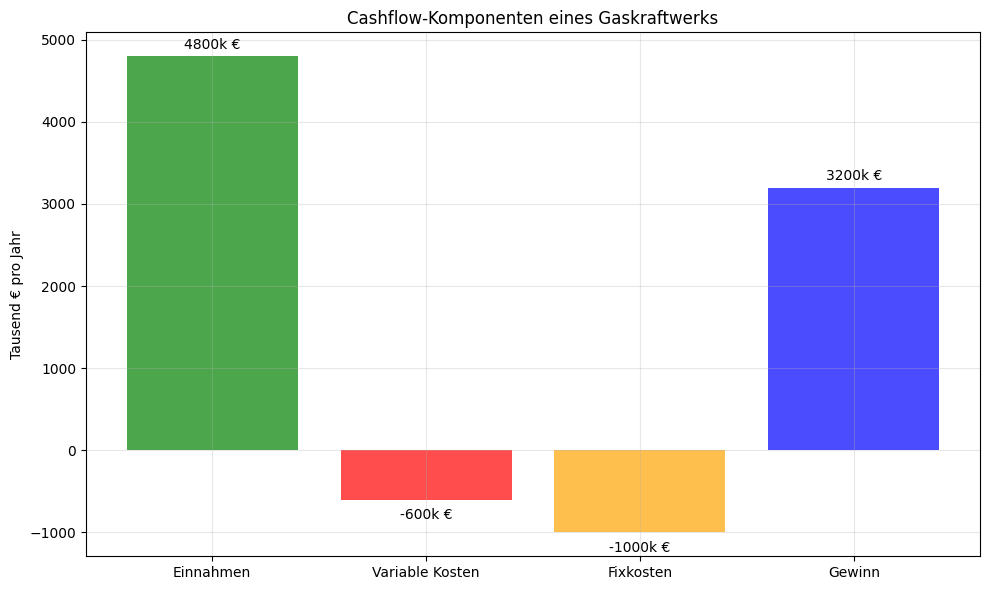

In [16]:
# Beispiel: Wirtschaftlichkeit eines Gaskraftwerks
import matplotlib.pyplot as plt

# Schritt 1: Gegebene Werte definieren
leistung_mw = 20            # installierte Leistung in MW
vollaststunden = 3000       # Volllaststunden im Jahr
strompreis = 80             # Strompreis in €/MWh
vom = 10                    # variable Betriebskosten in €/MWh
fom = 50_000                # fixe Betriebskosten in €/MW/a

# Schritt 2: Produktion berechnen (Energieerzeugung in MWh)
produktion_mwh = leistung_mw * vollaststunden

# Schritt 3: Cashflows berechnen
einnahmen = strompreis * produktion_mwh
kosten_vom = vom * produktion_mwh
kosten_fom = fom * leistung_mw
jahresgewinn = einnahmen - kosten_vom - kosten_fom

# Schritt 4: Ausgabe formatieren
def format_eur(value):
    return f"{value:,.0f} €".replace(",", ".")

print(f"Produktion: {produktion_mwh:,} MWh".replace(",", "."))
print(f"Einnahmen: {format_eur(einnahmen)}")
print(f"Variable Kosten: {format_eur(kosten_vom)}")
print(f"Fixkosten: {format_eur(kosten_fom)}")
print(f"Jährlicher Gewinn: {format_eur(jahresgewinn)}")

# Visualisierung der Cashflow-Komponenten
komponenten = ['Einnahmen', 'Variable Kosten', 'Fixkosten', 'Gewinn']
werte = [einnahmen/1000, -kosten_vom/1000, -kosten_fom/1000, jahresgewinn/1000]
farben = ['green', 'red', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(komponenten, werte, color=farben, alpha=0.7)
plt.ylabel('Tausend € pro Jahr')
plt.title('Cashflow-Komponenten eines Gaskraftwerks')
plt.grid(True, alpha=0.3)

# Werte auf den Balken anzeigen
for bar, wert in zip(bars, werte):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (50 if height > 0 else -100),
             f'{wert:.0f}k €', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

## 2.2 Kapitalwert

### Kapitalwert (Net Present Value, NPV)

$$\text{NPV} = \sum_{t=0}^{T} \frac{\text{CF}_t}{(1 + r)^t}$$

> Der Kapitalwert (Net Present Value, NPV) drückt aus, wie viel ein Projekt unter Berücksichtigung der Zeitwerts des Geldes heute wert ist. Alle zukünftigen Ein- und Auszahlungen werden mit einem festen Zinssatz auf den heutigen Wert abgezinst.

### Beispielhafte Berechnung

**Aufgabe:**
Ein Projekt erfordert eine Anfangsinvestition von 1.000.000 €. Es generiert über 10 Jahre hinweg jährlich 150.000 € Rückflüsse. Berechne den Kapitalwert bei einem Zinssatz von 5 %.

**Manuelle Lösungsschritte:**

$$\text{NPV} = \sum_{t=0}^{10} \frac{\text{CF}_t}{(1 + r)^t}$$

$$\text{NPV} = \frac{-1000000}{(1 + 0{,}05)^0} + \sum_{t=1}^{10} \frac{150000}{(1 + 0{,}05)^t}$$

$$\rightarrow \text{NPV} = 158.739 \text{€}$$

```python
# Kapitalwertberechnung mit fixen Rückflüssen
cashflows = [-1000000] + [150000] * 10
zinssatz = 0.05
npv = sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))
print(f"Kapitalwert (NPV): {npv:.2f} €")
```

### Interpretation des Kapitalwerts

- Ist der Kapitalwert kleiner als 0 €, ist die Investition nicht rentabel.
- Beträgt der Kapitalwert genau 0 €, erwirtschaften Sie gerade genug, um Ihre Anfangsinvestition zurückzubekommen, erzielen aber keine Gewinne.
- Ist der Kapitalwert größer als 0 €, erwarten Sie, Gewinne aus der Investition zu erzielen.

In [8]:
# Kapitalwertberechnung mit fixen Rückflüssen
cashflows = [-1000000] + [150000] * 10
zinssatz = 0.05
npv = sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))
print(f"Kapitalwert (NPV): {npv:.2f} €")

Produktion: 60000 MWh
Einnahmen: 4800000,00 €
Variable Kosten: 600000,00 €
Fixkosten: 1000000,00 €
Jährlicher Gewinn: 3200000,00 €


## 2.3 Unsicherheitsanalyse

Da die Lebensdauer von Kraftwerken relativ lang ist (typischerweise mehr als 20 Jahre), stellen Investitionen in Energieinfrastrukturen meist langfristige Investitionen dar. Bei der Berechnung des Kapitalwerts (NPV) ist daher ein Großteil der benötigten Informationen entweder nicht verfügbar oder sehr unsicher (z.B. zukünftige Strom- oder Brennstoffpreise). Diese Unsicherheiten sollten bei der Berechnung des NPV berücksichtigt werden, da sie die Rentabilität der Investitionen erheblich beeinflussen können.

In dieser Fallstudie verwenden wir **Normalverteilungen**, um die Bandbreite unsicherer Parameter darzustellen. Mithilfe der **Monte-Carlo-Methode** untersuchen wir den Einfluss der Parameterunsicherheit auf den Kapitalwert. Die Ergebnisse präsentieren wir anschließend als **Boxplots**.

### 2.3.1 Normalverteilung

Die **Normalverteilung** ist eine stetige Wahrscheinlichkeitsverteilung für reelle Zufallsvariablen. Für eine Zufallsvariable $x$ wird die Normalverteilung wie folgt dargestellt:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]$$

Dabei ist:

- $\mu$ der **Mittelwert** (Erwartungswert) der Verteilung
- $\sigma$ die **Standardabweichung**, ein Maß für die Streuung der Werte um den Mittelwert

Die Normalverteilung wird häufig in Natur- und Sozialwissenschaften verwendet, insbesondere zur Approximation unbekannter Verteilungen. Dies liegt am **Zentralen Grenzwertsatz**, welcher besagt, dass selbst dann, wenn eine Zufallsvariable nicht normalverteilt ist, der Durchschnittswert dieser Zufallsvariable über mehrere Beobachtungen bei einer ausreichend großen Anzahl von Beobachtungen häufig zu einer Normalverteilung konvergiert.


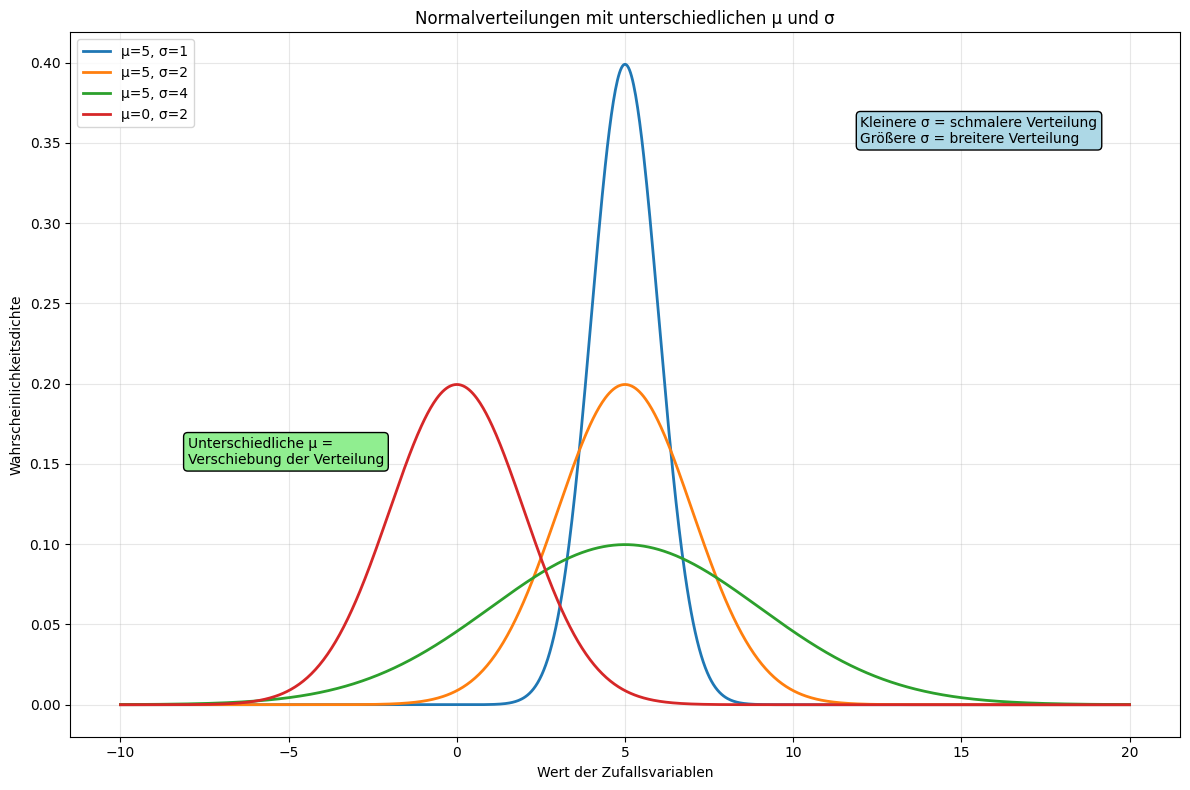

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wertebereich definieren
x = np.linspace(-10, 20, 1000)

# Normalverteilungen mit unterschiedlichen μ und σ
def normalverteilung(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

y1 = normalverteilung(x, 5, 1)
y2 = normalverteilung(x, 5, 2)
y3 = normalverteilung(x, 5, 4)
y4 = normalverteilung(x, 0, 2)

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.plot(x, y1, label='μ=5, σ=1', linewidth=2)
plt.plot(x, y2, label='μ=5, σ=2', linewidth=2)
plt.plot(x, y3, label='μ=5, σ=4', linewidth=2)
plt.plot(x, y4, label='μ=0, σ=2', linewidth=2)


# Diagramm beschriften
plt.xlabel('Wert der Zufallsvariablen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Normalverteilungen mit unterschiedlichen μ und σ')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Erklärungen hinzufügen
plt.text(12, 0.35, 'Kleinere σ = schmalere Verteilung\nGrößere σ = breitere Verteilung',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(-8, 0.15, 'Unterschiedliche μ = \nVerschiebung der Verteilung',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

### 2.3.2 Monte-Carlo-Methode

Die **Monte-Carlo-Methode** (benannt nach dem berühmten Monte-Carlo-Casino in Monaco) ist ein Verfahren zur Modellierung und Analyse komplexer Systeme. Die Grundidee besteht darin, Erkenntnisse über ein komplexes System zu gewinnen, indem man das System eine Vielzahl von Malen mit unterschiedlichen Eingabeparametern simuliert. Diese Eingabeparameter werden dabei typischerweise aus zuvor festgelegten Bereichen und Verteilungen gezogen, um realistische Werte zu erhalten.

Für unsere Fallstudie bedeutet dies:
Zur Bewertung der Unsicherheit bei den Eingabeparametern werden wir nicht nur einen einzelnen Kapitalwert (NPV) pro Technologie berechnen, sondern eine Vielzahl von Kapitalwerten. Für jeden unsicheren Eingabeparameter erhalten Sie eine Normalverteilung. Bei jeder NPV-Berechnung ziehen Sie zufällige Werte aus dieser Normalverteilung. So ergibt sich für jede Technologie eine große Anzahl von Kapitalwerten, welche die mögliche Bandbreite der Kapitalwerte unter Berücksichtigung der Unsicherheit der Eingabeparameter widerspiegelt.


=== Monte-Carlo-Simulation: NPV-Analyse ===
Anzahl Simulationen: 1000
Mittlerer NPV: 38,403,641 €
Standardabweichung: 11,954,520 €
Minimum: 5,253,984 €
Maximum: 83,379,877 €
Wahrscheinlichkeit NPV > 0: 100.0%


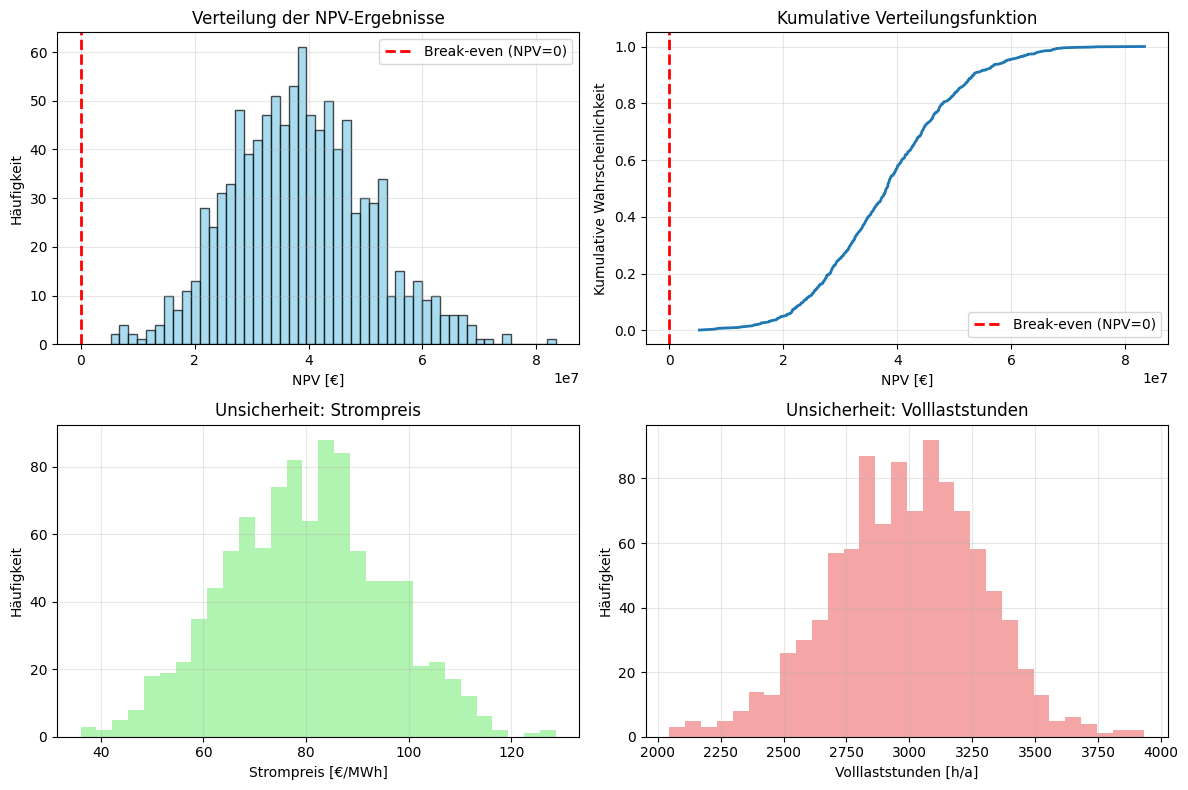

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Monte-Carlo-Simulation für Kraftwerks-NPV
def monte_carlo_npv_simulation(n_simulationen=1000):
    np.random.seed(42)  # Für reproduzierbare Ergebnisse

    # Unsichere Parameter (Normalverteilungen)
    strompreis_mean, strompreis_std = 80, 15  # €/MWh
    vollaststunden_mean, vollaststunden_std = 3000, 300  # h/a
    investition_mean, investition_std = 2000000, 200000  # €

    # Fixe Parameter
    leistung_mw = 20
    vom = 10  # €/MWh
    fom = 50000  # €/MW/a
    laufzeit = 20  # Jahre
    zinssatz = 0.05

    npv_ergebnisse = []

    for i in range(n_simulationen):
        # Zufällige Werte aus Normalverteilungen ziehen
        strompreis = np.random.normal(strompreis_mean, strompreis_std)
        vollaststunden = np.random.normal(vollaststunden_mean, vollaststunden_std)
        investition = np.random.normal(investition_mean, investition_std)

        # Sicherstellen, dass Werte positiv sind
        strompreis = max(strompreis, 0)
        vollaststunden = max(vollaststunden, 0)
        investition = max(investition, 0)

        # Jährliche Cashflows berechnen
        produktion_mwh = leistung_mw * vollaststunden
        einnahmen = strompreis * produktion_mwh
        kosten_vom = vom * produktion_mwh
        kosten_fom = fom * leistung_mw
        jahres_cashflow = einnahmen - kosten_vom - kosten_fom

        # NPV berechnen
        npv = -investition  # Jahr 0
        for jahr in range(1, laufzeit + 1):
            npv += jahres_cashflow / (1 + zinssatz) ** jahr

        npv_ergebnisse.append(npv)

    return np.array(npv_ergebnisse)

# Simulation durchführen
npv_results = monte_carlo_npv_simulation(1000)

# Ergebnisse analysieren
print("=== Monte-Carlo-Simulation: NPV-Analyse ===")
print(f"Anzahl Simulationen: {len(npv_results)}")
print(f"Mittlerer NPV: {np.mean(npv_results):,.0f} €")
print(f"Standardabweichung: {np.std(npv_results):,.0f} €")
print(f"Minimum: {np.min(npv_results):,.0f} €")
print(f"Maximum: {np.max(npv_results):,.0f} €")
print(f"Wahrscheinlichkeit NPV > 0: {(npv_results > 0).mean():.1%}")

# Visualisierung der NPV-Verteilung
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(npv_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even (NPV=0)')
plt.xlabel('NPV [€]')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der NPV-Ergebnisse')
plt.legend()
plt.grid(True, alpha=0.3)

# Kumulative Verteilung
plt.subplot(2, 2, 2)
sorted_npv = np.sort(npv_results)
cumulative = np.arange(1, len(sorted_npv) + 1) / len(sorted_npv)
plt.plot(sorted_npv, cumulative, linewidth=2)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even (NPV=0)')
plt.xlabel('NPV [€]')
plt.ylabel('Kumulative Wahrscheinlichkeit')
plt.title('Kumulative Verteilungsfunktion')
plt.legend()
plt.grid(True, alpha=0.3)

# Eingabeparameter visualisieren
plt.subplot(2, 2, 3)
strompreise = np.random.normal(80, 15, 1000)
plt.hist(strompreise, bins=30, alpha=0.7, color='lightgreen')
plt.xlabel('Strompreis [€/MWh]')
plt.ylabel('Häufigkeit')
plt.title('Unsicherheit: Strompreis')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
vollaststunden = np.random.normal(3000, 300, 1000)
plt.hist(vollaststunden, bins=30, alpha=0.7, color='lightcoral')
plt.xlabel('Volllaststunden [h/a]')
plt.ylabel('Häufigkeit')
plt.title('Unsicherheit: Volllaststunden')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3.3 Boxplots

Zur Visualisierung der Ergebnisse verwenden wir **Boxplots**. Boxplots sind Diagramme, die hilfreich sind, um die Verteilung von Daten darzustellen und gleichzeitig wichtige Kennzahlen wie den **Median**, das **Minimum** und **Maximum** sowie das **untere Quartil (25%-Quartil)** und das **obere Quartil (75%-Quartil)** übersichtlich zu präsentieren.

Ein Boxplot lässt sich wie folgt interpretieren:

- **Median:** Teilt die Daten genau in der Mitte; 50 % der Datenpunkte liegen darüber und 50 % darunter.
- **Unteres Quartil (Q1, 25 %):** 25 % der Datenpunkte liegen darunter, 75 % darüber.
- **Oberes Quartil (Q3, 75 %):** 75 % der Datenpunkte liegen darunter, 25 % darüber.
- **Interquartilsabstand (IQR):** Bereich zwischen oberem und unterem Quartil.
- **Whisker (Antennen):** Linien, die typischerweise das 1,5-fache des IQR umfassen. Datenpunkte außerhalb der Whisker gelten als Ausreißer.
- **Ausreißer:** Werte, die deutlich von den restlichen Daten abweichen.

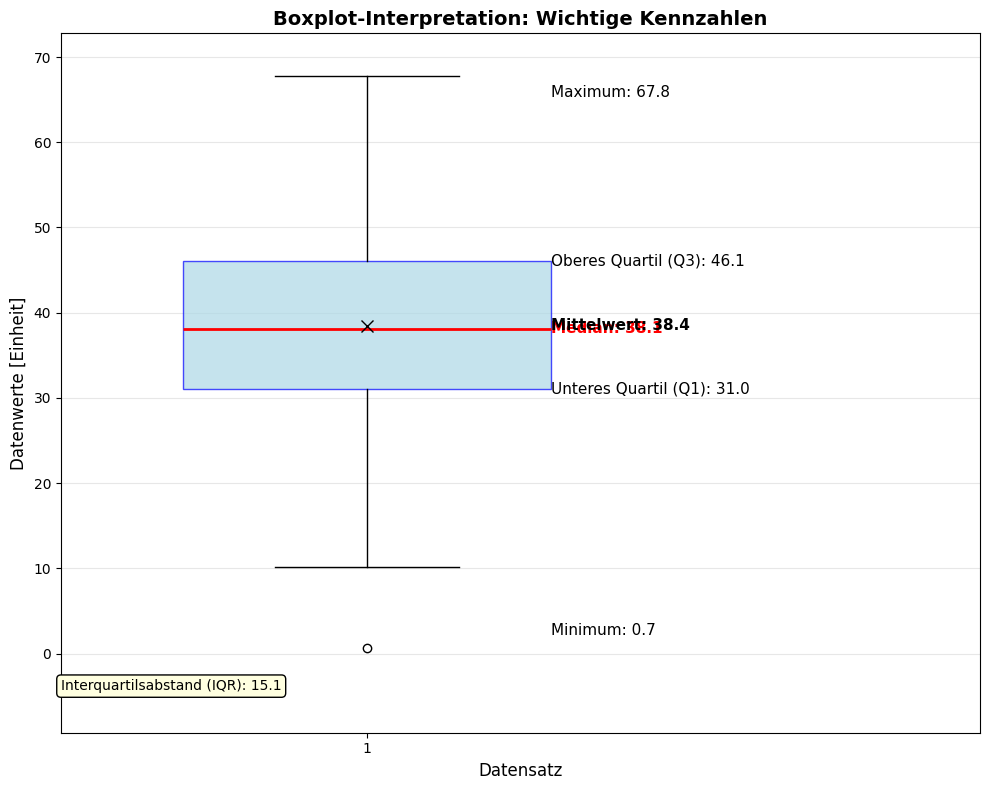

=== Boxplot-Kennzahlen ===
Minimum: 0.70
Q1 (25%-Quartil): 30.99
Median (50%-Quartil): 38.10
Mittelwert: 38.44
Q3 (75%-Quartil): 46.09
Maximum: 67.78
Interquartilsabstand (IQR): 15.10
Spannweite: 67.08


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Beispieldaten generieren
np.random.seed(42)
data = np.random.normal(40, 15, 100)

# Boxplot erstellen
plt.figure(figsize=(10, 8))

# Boxplot mit angepassten Eigenschaften
box_props = dict(facecolor='lightblue', color='blue', alpha=0.7)
median_props = dict(color='red', linewidth=2)
mean_props = dict(marker='x', markerfacecolor='black', markeredgecolor='black', markersize=8)

plt.boxplot(data, boxprops=box_props, medianprops=median_props, meanprops=mean_props,
            meanline=False, showmeans=True, widths=0.6, patch_artist=True)

# Kennzahlen berechnen
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
minimum = np.min(data)
maximum = np.max(data)
mean = np.mean(data)

# Beschriftungen hinzufügen
plt.text(1.3, q3, f'Oberes Quartil (Q3): {q3:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, median, f'Median: {median:.1f}', fontsize=11, verticalalignment='center', color='red', weight='bold')
plt.text(1.3, mean, f'Mittelwert: {mean:.1f}', fontsize=11, verticalalignment='center', color='black', weight='bold')
plt.text(1.3, q1, f'Unteres Quartil (Q1): {q1:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, minimum + 2, f'Minimum: {minimum:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, maximum - 2, f'Maximum: {maximum:.1f}', fontsize=11, verticalalignment='center')

# Zusätzliche Informationen
iqr = q3 - q1
plt.text(0.5, minimum - 5, f'Interquartilsabstand (IQR): {iqr:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

# Achsentitel und Titel
plt.ylabel('Datenwerte [Einheit]', fontsize=12)
plt.title('Boxplot-Interpretation: Wichtige Kennzahlen', fontsize=14, weight='bold')
plt.xlabel('Datensatz', fontsize=12)

# Gitternetz
plt.grid(True, axis='y', alpha=0.3)

# Achsenlimits anpassen
plt.ylim(minimum - 10, maximum + 5)
plt.xlim(0.5, 2.0)

plt.tight_layout()
plt.show()

# Kennzahlen ausgeben
print("=== Boxplot-Kennzahlen ===")
print(f"Minimum: {minimum:.2f}")
print(f"Q1 (25%-Quartil): {q1:.2f}")
print(f"Median (50%-Quartil): {median:.2f}")
print(f"Mittelwert: {mean:.2f}")
print(f"Q3 (75%-Quartil): {q3:.2f}")
print(f"Maximum: {maximum:.2f}")
print(f"Interquartilsabstand (IQR): {iqr:.2f}")
print(f"Spannweite: {maximum - minimum:.2f}")

/var/folders/2d/nxl0wz4j7sbbmdh6ftll5xqc0000gn/T/ipykernel_67480/1446043919.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(technologien, labels=labels, patch_artist=True,


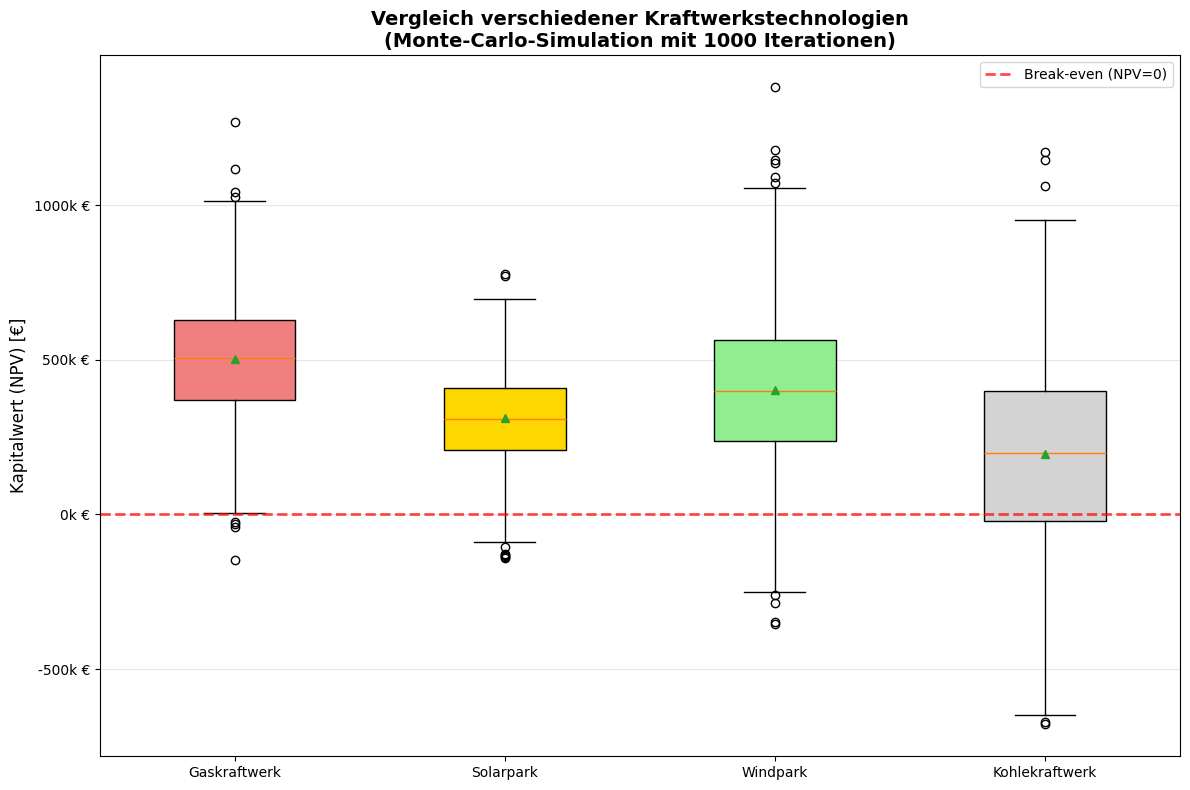

=== Investitionsrisiko-Analyse ===
Gaskraftwerk:
  Wahrscheinlichkeit NPV > 0: 99.6%
  Median NPV: 505,060 €

Solarpark:
  Wahrscheinlichkeit NPV > 0: 98.2%
  Median NPV: 309,462 €

Windpark:
  Wahrscheinlichkeit NPV > 0: 95.2%
  Median NPV: 399,937 €

Kohlekraftwerk:
  Wahrscheinlichkeit NPV > 0: 72.4%
  Median NPV: 200,055 €



In [4]:
# Vergleich mehrerer Technologien mit Boxplots
np.random.seed(42)

# Simulierte NPV-Daten für verschiedene Technologien
gas_npv = np.random.normal(500000, 200000, 1000)
solar_npv = np.random.normal(300000, 150000, 1000)
wind_npv = np.random.normal(400000, 250000, 1000)
kohle_npv = np.random.normal(200000, 300000, 1000)

# Daten für Boxplot vorbereiten
technologien = [gas_npv, solar_npv, wind_npv, kohle_npv]
labels = ['Gaskraftwerk', 'Solarpark', 'Windpark', 'Kohlekraftwerk']

# Boxplot erstellen
plt.figure(figsize=(12, 8))

# Farbschema definieren
colors = ['lightcoral', 'gold', 'lightgreen', 'lightgray']
box_props = [dict(facecolor=color, alpha=0.7) for color in colors]

# Boxplots erstellen
bp = plt.boxplot(technologien, labels=labels, patch_artist=True,
                 showmeans=True, meanline=False)

# Farben zuweisen
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Null-Linie hinzufügen
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even (NPV=0)')

# Beschriftung
plt.ylabel('Kapitalwert (NPV) [€]', fontsize=12)
plt.title('Vergleich verschiedener Kraftwerkstechnologien\n(Monte-Carlo-Simulation mit 1000 Iterationen)',
          fontsize=14, weight='bold')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Y-Achse formatieren
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k €'))

plt.tight_layout()
plt.show()

# Wahrscheinlichkeiten für positive NPV berechnen
print("=== Investitionsrisiko-Analyse ===")
for i, (tech, data) in enumerate(zip(labels, technologien)):
    positive_npv = (data > 0).mean()
    median_npv = np.median(data)
    print(f"{tech}:")
    print(f"  Wahrscheinlichkeit NPV > 0: {positive_npv:.1%}")
    print(f"  Median NPV: {median_npv:,.0f} €")
    print()

## 2.4 Hinweise

### Excel-Hinweise

Die Excel-Befehle sind hier generell auf Englisch angegeben. In Klammern steht jeweils die deutsche Übersetzung, falls Sie mit einer deutschen Excel-Version arbeiten.
**Hinweis:** Wenn Sie ein deutsches Excel verwenden, müssen die Argumente einer Funktion mit Semikolon (`;`) statt mit Komma (`,`) getrennt werden.
Beispiel: `REST(Zahl; Divisor)` statt `REST(Zahl, Divisor)`.

**Zufallszahlen aus einer Normalverteilung ziehen**

Um einen Wert aus einer Normalverteilung zu ziehen, verwenden Sie in Excel die Funktion:

```excel
NORM.INV(probability, mean, standard deviation)
```

Für eine Zufallszahl verwenden Sie `RAND()` als probability-Argument:

```excel
NORM.INV(RAND(), mittelwert, standardabweichung)
```

**Praktische Tipps**

- Nutze separate Zellen für Parameter und Formeln.
- Diagramme für Szenarienvergleich und Sensitivität sind sehr hilfreich.
- Beachte absolute vs. relative Zellbezüge für Wiederverwendbarkeit der Berechnung.

### Python-Alternative

Für fortgeschrittene Nutzer bietet Python eine Alternative zu Excel:

```python
import numpy as np
import matplotlib.pyplot as plt

# NPV-Berechnung in Python
def berechne_npv(cashflows, zinssatz):
    """
    Berechnet den Kapitalwert (NPV) einer Investition

    Parameter:
    cashflows: Liste der Cashflows [Jahr0, Jahr1, Jahr2, ...]
    zinssatz: Diskontierungssatz (z.B. 0.05 für 5%)

    Rückgabe:
    NPV in der gleichen Währungseinheit wie die Cashflows
    """
    return sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))

# Beispiel: NPV-Berechnung
investition = -1000000  # Negative Zahl für Ausgabe
jaehrliche_rueckfluesse = [150000] * 10  # 10 Jahre à 150.000€
cashflows = [investition] + jaehrliche_rueckfluesse
zinssatz = 0.05

npv = berechne_npv(cashflows, zinssatz)
print(f"Kapitalwert: {npv:,.2f} €")

# Monte-Carlo-Simulation in Python
def monte_carlo_npv(n_simulationen=1000,
                   strompreis_params=(80, 15),
                   vollaststunden_params=(3000, 300),
                   investition_params=(2000000, 200000)):
    """
    Monte-Carlo-Simulation für NPV-Berechnung

    Parameter sind Tupel: (Mittelwert, Standardabweichung)
    """

    np.random.seed(42)  # Reproduzierbare Ergebnisse
    npv_ergebnisse = []

    # Fixe Parameter
    leistung_mw = 20
    vom = 10  # €/MWh
    fom = 50000  # €/MW/a
    laufzeit = 20
    zinssatz = 0.05

    for _ in range(n_simulationen):
        # Zufallswerte ziehen
        strompreis = max(0, np.random.normal(*strompreis_params))
        vollaststunden = max(0, np.random.normal(*vollaststunden_params))
        investition = max(0, np.random.normal(*investition_params))

        # Cashflows berechnen
        produktion = leistung_mw * vollaststunden
        jahres_cf = (strompreis - vom) * produktion - fom * leistung_mw

        # NPV berechnen
        cashflows = [-investition] + [jahres_cf] * laufzeit
        npv = berechne_npv(cashflows, zinssatz)
        npv_ergebnisse.append(npv)

    return np.array(npv_ergebnisse)

# Simulation ausführen
ergebnisse = monte_carlo_npv(1000)

# Statistiken ausgeben
print(f"Mittlerer NPV: {np.mean(ergebnisse):,.0f} €")
print(f"Standardabweichung: {np.std(ergebnisse):,.0f} €")
print(f"Wahrscheinlichkeit NPV > 0: {(ergebnisse > 0).mean():.1%}")

# Einfache Visualisierung
plt.figure(figsize=(10, 6))
plt.hist(ergebnisse, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.xlabel('NPV [€]')
plt.ylabel('Häufigkeit')
plt.title('Monte-Carlo-Simulation: NPV-Verteilung')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot für Technologievergleich
def technologie_vergleich():
    """Vergleicht verschiedene Kraftwerkstechnologien"""

    # Parameter für verschiedene Technologien
    technologien = {
        'Gas': {'strompreis': (80, 15), 'vollast': (4000, 400), 'invest': (1500000, 150000)},
        'Solar': {'strompreis': (85, 20), 'vollast': (1200, 200), 'invest': (2500000, 250000)},
        'Wind': {'strompreis': (82, 18), 'vollast': (2500, 500), 'invest': (3000000, 300000)}
    }

    ergebnisse = {}

    for name, params in technologien.items():
        npv_werte = monte_carlo_npv(500,
                                   params['strompreis'],
                                   params['vollast'],
                                   params['invest'])
        ergebnisse[name] = npv_werte

    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    plt.boxplot(ergebnisse.values(), labels=ergebnisse.keys(),
                patch_artist=True, showmeans=True)
    plt.axhline(0, color='red', linestyle='--', alpha=0.7, label='Break-even')
    plt.ylabel('NPV [€]')
    plt.title('Technologievergleich: NPV-Unsicherheiten')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # Statistiken ausgeben
    for name, werte in ergebnisse.items():
        print(f"{name}: Median NPV = {np.median(werte):,.0f} €, "
              f"P(NPV>0) = {(werte > 0).mean():.1%}")

# Funktionen für Sensitivitätsanalyse
def sensitivitaetsanalyse(parameter='strompreis', variation_prozent=20):
    """
    Führt eine Sensitivitätsanalyse für einen Parameter durch
    """

    # Basis-NPV berechnen
    basis_cf = [-2000000] + [2200000] * 20  # Vereinfachtes Beispiel
    basis_npv = berechne_npv(basis_cf, 0.05)

    # Variationen testen
    variationen = np.linspace(-variation_prozent/100, variation_prozent/100, 21)
    npv_werte = []

    for var in variationen:
        # Parameter variieren (vereinfacht)
        cf_variiert = [-2000000] + [2200000 * (1 + var)] * 20
        npv_var = berechne_npv(cf_variiert, 0.05)
        npv_werte.append(npv_var)

    # Visualisierung
    plt.figure(figsize=(10, 6))
    plt.plot(variationen * 100, npv_werte, 'b-', linewidth=2, marker='o')
    plt.axhline(0, color='red', linestyle='--', alpha=0.7)
    plt.axvline(0, color='gray', linestyle='-', alpha=0.5)
    plt.xlabel(f'{parameter.capitalize()} Variation [%]')
    plt.ylabel('NPV [€]')
    plt.title(f'Sensitivitätsanalyse: {parameter.capitalize()}')
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Basis-NPV: {basis_npv:,.0f} €")
    print(f"NPV-Spanne bei ±{variation_prozent}% {parameter}: "
          f"{min(npv_werte):,.0f} € bis {max(npv_werte):,.0f} €")

# Verwendungsbeispiele auskommentiert:
# technologie_vergleich()
# sensitivitaetsanalyse('strompreis', 30)

## 2.5 Lernkontrollfragen

Die folgenden Fragen dienen Ihrer Selbstüberprüfung und haben keinen Einfluss auf die Bonuspunkte der Fallstudie.

In [8]:
# Multiple-Choice-System - funktioniert ohne ipywidgets
import matplotlib.pyplot as plt

class LernkontrolleFragen:
    def __init__(self):
        self.punkte = 0
        self.fragen_beantwortet = []

    def frage_1(self):
        print("=== Frage 1: Cashflows bei Solarkraftwerken ===")
        print("Welche Cashflows treten bei einem Photovoltaikkraftwerk NICHT auf?")
        print("(Mehrfachauswahl möglich)")
        print()
        print("A) CF_CO2 (CO₂-Kosten)")
        print("B) CF_sell (Verkauf von Strom)")
        print("C) CF_fuel (Brennstoffkosten)")
        print()

        antwort = input("Ihre Antwort (z.B. 'AC' für A und C): ").upper().strip()

        korrekt = set(['A', 'C'])  # A und C sind richtig
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("✅ Richtig! Photovoltaik braucht weder Brennstoff noch verursacht CO₂-Emissionen.")
            self.punkte += 1
        else:
            print("❌ Nicht ganz richtig.")
            print("Korrekte Antwort: A und C")
            print("Erklärung: Solaranlagen haben keine Brennstoffkosten und keine direkten CO₂-Emissionen.")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_2(self):
        print("=== Frage 2: Fixe Betriebskosten ===")
        print("Fixe Betriebs- und Wartungskosten (FOM-Kosten)...")
        print()
        print("A) ...hängen vom CO₂-Preis ab")
        print("B) ...können in der Einheit €/MWh/a angegeben werden")
        print("C) ...beschreiben Kosten, die unabhängig von der Stromerzeugung auftreten")
        print()

        antwort = input("Ihre Antwort (A, B oder C): ").upper().strip()

        if antwort == 'C':
            print("✅ Richtig! FOM-Kosten sind fix und unabhängig von der Produktion.")
            self.punkte += 1
        else:
            print("❌ Nicht richtig.")
            print("Korrekte Antwort: C")
            print("Erklärung: FOM-Kosten sind fixe Kosten (€/MW/a), die unabhängig von der")
            print("tatsächlichen Stromproduktion anfallen (z.B. Personal, Wartung).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_3(self):
        print("=== Frage 3: Kapitalwert (NPV) ===")
        print("Der Kapitalwert (NPV)...")
        print("(Mehrfachauswahl möglich)")
        print()
        print("A) ...basiert auf der Idee, dass Einnahmen in ferner Zukunft wertvoller sind")
        print("B) ...ist unabhängig von Wartungskosten")
        print("C) ...ist ein Maß zur Bewertung von Investitionen")
        print()

        antwort = input("Ihre Antwort (z.B. 'BC' für B und C): ").upper().strip()

        if antwort == 'C':
            print("✅ Richtig! Nur C ist korrekt.")
            self.punkte += 1
        else:
            print("❌ Nicht richtig.")
            print("Korrekte Antwort: C")
            print("Erklärung: NPV diskontiert zukünftige Cashflows ab (A falsch),")
            print("berücksichtigt alle Kosten inkl. Wartung (B falsch) und")
            print("ist ein wichtiges Investitionsbewertungstool (C richtig).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_4(self):
        print("=== Frage 4: Normalverteilung ===")
        print("Die Normalverteilung...")
        print("(Mehrfachauswahl möglich)")
        print()
        print("A) ...kann jede beliebige Verteilung exakt beschreiben")
        print("B) ...wird häufig genutzt, um Zufallsvariablen zu beschreiben")
        print("C) ...hängt vom Mittelwert und der Standardabweichung ab")
        print()

        antwort = input("Ihre Antwort (z.B. 'BC' für B und C): ").upper().strip()

        korrekt = set(['B', 'C'])
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("✅ Richtig! B und C sind korrekt.")
            self.punkte += 1
        else:
            print("❌ Nicht ganz richtig.")
            print("Korrekte Antwort: B und C")
            print("Erklärung: Normalverteilung ist eine Approximation (A falsch),")
            print("wird häufig verwendet (B richtig) und wird durch μ und σ definiert (C richtig).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_5(self):
        print("=== Frage 5: Monte-Carlo-Simulation ===")
        print("Was macht man bei einer Monte-Carlo-Simulation?")
        print("(Mehrfachauswahl möglich)")
        print()
        print("A) Roulette spielen")
        print("B) Das System mehrfach mit verschiedenen Eingabeparametern berechnen")
        print("C) Schlüsse über komplexe Systeme aus multiplen Berechnungen ziehen")
        print("D) Eingabeparameter zufällig aus Verteilungen ziehen")
        print()

        antwort = input("Ihre Antwort (z.B. 'BCD' für B, C und D): ").upper().strip()

        korrekt = set(['B', 'C', 'D'])
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("✅ Richtig! B, C und D beschreiben Monte-Carlo-Simulation korrekt.")
            self.punkte += 1
        else:
            print("❌ Nicht ganz richtig.")
            print("Korrekte Antwort: B, C und D")
            print("Erklärung: Monte-Carlo simuliert Systeme durch multiple Berechnungen")
            print("mit zufälligen Parametern aus Verteilungen, um komplexe Systeme zu verstehen.")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def alle_fragen(self):
        print("🎓 LERNKONTROLLE: Theoretische Grundlagen")
        print("=" * 60)
        print()

        self.frage_1()
        self.frage_2()
        self.frage_3()
        self.frage_4()
        self.frage_5()

        print("=" * 60)
        print(f"🎯 ENDERGEBNIS: {self.punkte}/5 Punkte")

        if self.punkte == 5:
            print("🏆 Ausgezeichnet! Sie haben alle Konzepte verstanden.")
        elif self.punkte >= 3:
            print("👍 Gut gemacht! Die wichtigsten Konzepte sind verstanden.")
        else:
            print("📚 Bitte wiederholen Sie die entsprechenden Abschnitte.")

        return self.punkte

# Verwendung:
# quiz = LernkontrolleFragen()
# quiz.alle_fragen()

### Interaktive Nutzung

Um die Lernkontrolle zu starten, führen Sie folgenden Code aus:

```python
# Lernkontrolle starten
quiz = LernkontrolleFragen()
quiz.alle_fragen()
```

### Einzelne Fragen

Sie können auch einzelne Fragen bearbeiten:

```python
quiz = LernkontrolleFragen()
quiz.frage_1()  # Nur Frage 1
quiz.frage_2()  # Nur Frage 2
# etc.
```

In [9]:
# Lernkontrolle starten
quiz = LernkontrolleFragen()
quiz.alle_fragen()

🎓 LERNKONTROLLE: Theoretische Grundlagen

=== Frage 1: Cashflows bei Solarkraftwerken ===
Welche Cashflows treten bei einem Photovoltaikkraftwerk NICHT auf?
(Mehrfachauswahl möglich)

A) CF_CO2 (CO₂-Kosten)
B) CF_sell (Verkauf von Strom)
C) CF_fuel (Brennstoffkosten)



KeyboardInterrupt: Interrupted by user